# Курсовой проект для курса "Python для Data Science"

## Подключаем необходимые библиотеки

In [135]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from sklearn.linear_model import Lasso
%matplotlib inline

In [ ]:
def q2(df,x,y):
    #df - датасет
    #x - параметр относительно которого считатеся переменная
    #y - целевая переменная 
    q1 = []
    q2 = []
    
    for i1 in np.arange(0, 1, 0.05):
        i2 = i1 + 0.05
        x2 = df[y][df[x].between(df[x].quantile(q = i1), df[x].quantile(q = i2))].mean()
        x3 = df[x][df[x].between(df[x].quantile(q = i1), df[x].quantile(q = i2))].mean()
        #x2 = train['Annual Income'][train['Annual Income'].between(train['Annual Income'].quantile(q = 0.1), train['Annual Income'].quantile(q = 0.2))].mean()
        #x3 = train['Credit Default'][train['Annual Income'].between(train['Annual Income'].quantile(q = 0.1), train['Annual Income'].quantile(q = 0.2))].mean()
        #x2 = df[y][df[x].between(df[x].quantile(q = i),df[x].quantile(q = x1)).mean()
        #x3 = df[x][df[x].between(df[x].quantile(q = i),df[x].quantile(q = x1)).mean()
        q1.append(x2)
        q2.append(x3)
    
    q3 = {y:x2,x:x3}
    q3 = pd.DataFrame(q3)
    q3.sort_values(by=y)
    rcParams["figure.figsize"] = 12, 8
    
    plt.plot(q3[q3.columns[0]], q3[q3.columns[1]])
    plt.xlabel(q3.columns[0])
    plt.ylabel(q3.columns[1])
            
    plt.show   

In [ ]:
def s1(df):
    s2 = df.select_dtypes(include='object').columns
    s3 = df.select_dtypes(exclude='object').columns
    
    for s4 in s2:
        df[s4] = df[s4].fillna(df[s4].mode())
    for s5 in s3:
        df[s5] = df[s5].fillna(df[s5].median())
    for s6 in s3:
        df.loc[df[s6] < df[s6].quantile(q = 0.01), [s6]] = df[s6].quantile(q = 0.01)
        df.loc[df[s6] > df[s6].quantile(q = 0.99), [s6]] = df[s6].quantile(q = 0.99)
    df['Years in current job'] = df.fillna(df['Years in current job'].mode())

In [ ]:
def q1(df,x,y):
    q2 = df[.value_counts().index
    q3 = []
    q9 = []
    #q4 = df2.columns[0]
    #q5 = df2.columns[1]
    for q6 in q2:
        q7 = df2[q5].loc[df2[q4] == q6].mean()
        q8 = df2[q4].loc[df2[q4] == q6].count()
        q3.append(q7)
        q9.append(q8)
    u = {q4 + ' ' + 'values':q2, 'mean ' + q5:q3, 'count ' + q4:q9}
    u = pd.DataFrame(u)
    u.sort_values(by='mean ' + q5, inplace=True)
    print(u)
    
    rcParams["figure.figsize"] = 12, 8
    
    plt.plot(u[u.columns[0]], u[u.columns[1]])
    plt.xlabel(u.columns[0])
    plt.ylabel(u.columns[1])
    
    plt.show

## Выгружаем данные по исследуемым обьектам

In [136]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

### Анализируем данные

In [137]:
train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


##### Можно выделить строки Id и DistrictId, они не несут какой-то качественной информации о недвижимости и будуб бесполезны для построяния модели. Так же видим что есть данные где Floor превышает HouseFloor.

In [138]:
train.shape

(10000, 20)

<function matplotlib.pyplot.show(close=None, block=None)>

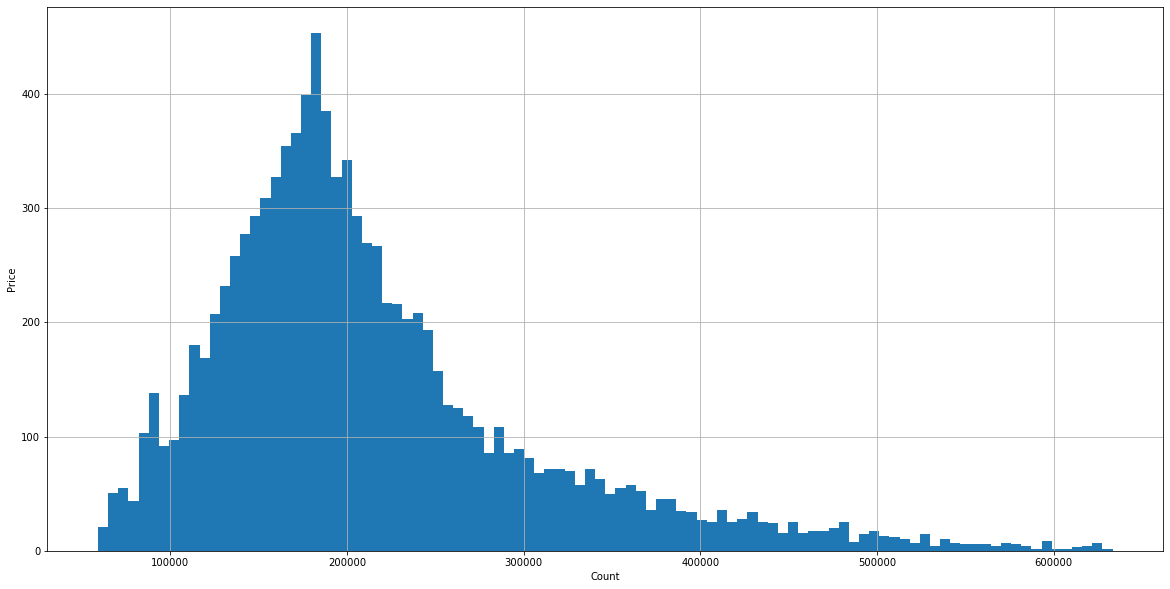

In [139]:
plt.figure(figsize = (20,10))
train['Price'].hist(bins = 100)
plt.xlabel('Count')
plt.ylabel('Price')
plt.show

##### датасет содержит 10000 позиций недвижимости и имеет нормальное распределение по целевой переменной.

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

#### имеется 2 неполных признака LifeSquare     7887/10000 и Healthcare_1   5202/10000 их необходимо дозаполнить. Так же имеются признаки с типом object их необходимо исследовать чуть подробнее.

In [141]:
train.describe(percentiles=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
1%,176.99000,1.000000,1.000000,29.719795,2.861463,0.000000,1.000000,0.000000,1.953000e+03,0.000000,0.000000,168.000000,0.000000,30.000000,0.000000,0.000000,73901.963805
10%,1656.90000,6.000000,1.000000,36.992781,19.576757,1.000000,3.000000,4.000000,1.965000e+03,0.000991,2.000000,475.000000,0.000000,125.000000,0.000000,0.000000,118846.147305
20%,3304.40000,10.800000,1.000000,40.397477,21.757954,1.000000,4.000000,5.000000,1.971000e+03,0.007720,5.000000,1437.000000,0.000000,240.000000,0.000000,0.000000,144036.094676
30%,4988.10000,23.000000,1.000000,43.094156,24.427702,1.000000,5.000000,9.000000,1.977000e+03,0.034656,11.000000,2733.000000,1.000000,540.000000,0.000000,1.000000,162618.878772
40%,6728.60000,27.000000,2.000000,46.819112,30.156068,5.000000,6.000000,12.000000,1.977000e+03,0.050756,22.000000,4386.000000,1.000000,645.000000,0.000000,2.000000,178426.852934
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879


##### Видим следующие подозрительные вещи:
    Мимальное значение Rooms = 0
    Мимальное значение Square = 1.136859
    Мимальное значение LifeSquare = 0.370619
    Мимальное значение HouseFloor = 0
    Максимальные значения HouseFloor, Floor, Rooms, Square, LifeSquare, KitchenSquare, Social_3 сильно отличаются от 99 персентиля

##### Видим что переменные типа object принимают 2 значения A и B, при том значение В явно сильно преобладает. 

##### предпримем следующие действия. 
    Исключим столбцы Id и DistrictId
    Исключим подозрительные значения.
    Допозаполним признаки LifeSquare и 5202/10000 и медианным значением
    В данных где Floor превышает HouseFloor, HouseFloor придадим значение Floor
    Столбец HouseYear заменим на House age отражающий возраст дома в годах
    Столбцы Ecology_2 Ecology_3 Shops_2 заменим на числовые

In [142]:
train.loc[train['Rooms'] < 1, 'Rooms'] = 1
train.loc[train['Rooms'] > 5, 'Rooms'] = 5
train.loc[train['Floor'] > 30, 'Floor'] = 30
train.loc[train['Square'] < 20, 'Square'] = 20
train.loc[train['Square'] > 120, 'Square'] = 120
train.loc[train['LifeSquare'] < 5, 'LifeSquare'] = 5
train.loc[train['LifeSquare'] > 120, 'LifeSquare'] = 120
train.loc[train['KitchenSquare'] < 1, 'KitchenSquare'] = 1
train.loc[train['KitchenSquare'] > 70, 'KitchenSquare'] = 70
train.loc[train['HouseFloor'] > 30, 'HouseFloor'] = 30
train.loc[train['Social_3'] > 50, 'Social_3'] = 50
train["LifeSquare"] = train["LifeSquare"].fillna(train["LifeSquare"].median())
train["Healthcare_1"] = train["Healthcare_1"].fillna(train["Healthcare_1"].median())
train.loc[train['HouseFloor'] < train['Floor'], 'HouseFloor'] = train['Floor']
yu = datetime.now()
yu = yu.year
train['house_age'] = yu - train["HouseYear"]
train.loc[train['house_age'] < 1] = 1
train.loc[train['Square'] < train['KitchenSquare'], 'KitchenSquare'] = train['Square'] * 0.5
train.loc[train['Square'] < train['LifeSquare'], 'LifeSquare'] = train['Square'] * 0.5
train = pd.get_dummies(train)
train = train.drop(["HouseYear", 'Id', 'DistrictId'],axis = 1)

##### Теперь данные выглядят корректными, попробуем добавить невсколько дополнительных признаков для лушей работы модели 

In [143]:
train['Mean_square_room'] = train['LifeSquare'] / train['Rooms']
train['Relative_lifesquare'] = train['LifeSquare'] / train['Square']
train['Relative_Kitchensquare'] = train['KitchenSquare'] / train['Square']
train['HouseFloor_floor'] = train['HouseFloor'] / train['Floor']
train['Relative_square'] = train['Square'].mean() / train['Square']
train['Floor_Square'] = train['Square'] / train['Floor']

train_y = train['Price']

train = train.drop(['Price'],axis = 1)

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rooms                   10000 non-null  float64
 1   Square                  10000 non-null  float64
 2   LifeSquare              10000 non-null  float64
 3   KitchenSquare           10000 non-null  float64
 4   Floor                   10000 non-null  int64  
 5   HouseFloor              10000 non-null  float64
 6   Ecology_1               10000 non-null  float64
 7   Social_1                10000 non-null  int64  
 8   Social_2                10000 non-null  int64  
 9   Social_3                10000 non-null  int64  
 10  Healthcare_1            10000 non-null  float64
 11  Helthcare_2             10000 non-null  int64  
 12  Shops_1                 10000 non-null  int64  
 13  house_age               10000 non-null  int64  
 14  Ecology_2_1             10000 non-null 

In [145]:
train.describe(percentiles=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,...,Ecology_3_B,Shops_2_1,Shops_2_A,Shops_2_B,Mean_square_room,Relative_lifesquare,Relative_Kitchensquare,HouseFloor_floor,Relative_square,Floor_Square
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.888700,56.003749,33.857056,5.917683,8.52290,13.389200,0.119012,24.681700,5351.06790,5.378800,...,0.97230,0.000200,0.082500,0.917300,19.669830,0.610733,0.113805,2.135077,1.110666,10.383288
std,0.813866,18.196117,14.071591,4.695188,5.22894,5.807176,0.119659,17.535733,4007.50212,10.986054,...,0.16412,0.014141,0.275139,0.275442,8.459572,0.159238,0.086379,1.877754,0.844300,10.295309
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.041667,0.008333,1.000000,0.466698,0.714286
1%,1.000000,29.673847,5.000000,1.000000,1.00000,3.000000,0.000000,0.000000,168.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,2.693380,0.087833,0.009738,1.000000,0.475187,2.063738
10%,1.000000,36.989983,19.829734,1.000000,3.00000,5.000000,0.000991,2.000000,475.00000,0.000000,...,1.00000,0.000000,0.000000,1.000000,12.889591,0.460096,0.015148,1.000000,0.692636,3.220867
20%,1.000000,40.392876,22.383998,1.000000,4.00000,9.000000,0.007720,5.000000,1437.00000,0.000000,...,1.00000,0.000000,0.000000,1.000000,14.830395,0.500000,0.020321,1.000000,0.795117,4.113730
30%,1.000000,43.091847,27.733482,1.000000,5.00000,9.000000,0.034656,11.000000,2733.00000,1.000000,...,1.00000,0.000000,0.000000,1.000000,15.723534,0.537138,0.026768,1.076923,0.883707,4.967153
40%,2.000000,46.819112,31.814337,5.000000,6.00000,12.000000,0.050756,22.000000,4386.00000,1.000000,...,1.00000,0.000000,0.000000,1.000000,16.390630,0.571897,0.103849,1.250000,0.968881,5.961509
50%,2.000000,52.513310,32.781260,6.000000,7.00000,14.000000,0.075424,25.000000,5285.00000,2.000000,...,1.00000,0.000000,0.000000,1.000000,16.867306,0.599251,0.120667,1.454545,1.066468,7.112265


##### Теперь приступим к построению модели на основе этих данных.
    Используем 2 модели LinearRegression(model1) и Lasso(model2), после выберем наиболее удачную
    Используем стандартизацию признаков при помощи метода StandardScaler
    Используем разбиение наших данных на тестовые и тренированче при помощи метода train_test_split

In [146]:
x_train, x_test, y_train, y_test = train_test_split(train, train_y, test_size=0.3, random_state = 30)
model1 = LinearRegression()
model2 = Lasso(alpha = 0.003)
model2_1 = Lasso(alpha = 0.003)
scaler = StandardScaler()

train_scaled = scaler.fit_transform(x_train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
test_scaled = scaler.transform(x_test)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

model1.fit(train_scaled,y_train)
model2.fit(train_scaled,y_train)
model2_1.fit(x_train,y_train)

D:\an\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391010038535.78125, tolerance: 6033525413.222248
  model = cd_fast.enet_coordinate_descent(
D:\an\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80853481967.74219, tolerance: 6033525413.222248
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.003)

### Проверим созданные модели.

In [150]:
y_pred1 = model1.predict(test_scaled)
y_pred2 = model2.predict(test_scaled)
y_pred2_1 = model2_1.predict(x_test)




In [152]:
pred = pd.DataFrame({"real_value":y_test, 'pred1':y_pred1, 'pred2':y_pred2, 'pred_2_1':y_pred2_1})

In [153]:
pred

,real_value,pred1,pred2,pred_2_1
8793,154268.366733,141400.339238,140253.329727,140250.824870
1122,104511.383250,188796.480509,184156.507475,184157.483506
1283,91660.877684,225283.419111,226331.553731,226331.548516
9318,160739.238428,132897.215007,134289.596899,134287.872509
7765,91354.549251,303975.146132,301414.152493,301414.057171
...,...,...,...,...
3024,103567.513833,116242.861768,123684.956256,123684.970449
5904,133273.635012,222680.213553,222553.316855,222556.039281
3807,252480.400098,269983.501693,268276.923392,268276.983588
6746,175299.739794,172633.517361,170876.029666,170875.579300


In [154]:
pred['error pred1'] = np.absolute(pred["real_value"] - pred['pred1'])
pred['error pred2'] = np.absolute(pred["real_value"] - pred['pred2'])

In [156]:
pred['error pred2_1'] = np.absolute(pred["real_value"] - pred['pred_2_1'])

pred

,real_value,pred1,pred2,pred_2_1,error pred1,error pred2,error pred2_1
8793,154268.366733,141400.339238,140253.329727,140250.824870,12868.027494,14015.037005,14017.541863
1122,104511.383250,188796.480509,184156.507475,184157.483506,84285.097259,79645.124225,79646.100256
1283,91660.877684,225283.419111,226331.553731,226331.548516,133622.541428,134670.676048,134670.670833
9318,160739.238428,132897.215007,134289.596899,134287.872509,27842.023421,26449.641529,26451.365920
7765,91354.549251,303975.146132,301414.152493,301414.057171,212620.596882,210059.603243,210059.507920
...,...,...,...,...,...,...,...
3024,103567.513833,116242.861768,123684.956256,123684.970449,12675.347935,20117.442423,20117.456616
5904,133273.635012,222680.213553,222553.316855,222556.039281,89406.578541,89279.681843,89282.404269
3807,252480.400098,269983.501693,268276.923392,268276.983588,17503.101594,15796.523294,15796.583490
6746,175299.739794,172633.517361,170876.029666,170875.579300,2666.222433,4423.710128,4424.160494


In [158]:
O = pred[(pred['error pred2'] > 50000)| (pred['error pred2_1'] > 50000)]
Oi = O.index

,real_value,pred1,pred2,pred_2_1,error pred1,error pred2,error pred2_1
1122,104511.383250,188796.480509,184156.507475,184157.483506,84285.097259,79645.124225,79646.100256
1283,91660.877684,225283.419111,226331.553731,226331.548516,133622.541428,134670.676048,134670.670833
7765,91354.549251,303975.146132,301414.152493,301414.057171,212620.596882,210059.603243,210059.507920
5753,282877.332154,334569.531337,340161.503934,340158.130054,51692.199183,57284.171780,57280.797900
6201,531049.721966,436079.582960,426371.008583,426366.989850,94970.139007,104678.713383,104682.732116
...,...,...,...,...,...,...,...
1369,189244.249909,327765.915357,321420.298421,321421.000682,138521.665448,132176.048512,132176.750774
3325,116920.105413,182943.650942,176810.931002,176811.782207,66023.545529,59890.825588,59891.676794
3832,494730.424976,331868.237778,335809.113144,335809.731718,162862.187199,158921.311832,158920.693258
5677,129673.458274,263752.224903,265332.553541,265333.353842,134078.766630,135659.095267,135659.895568


In [132]:
x_test.loc[Oi].head(20)

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,...,Ecology_3_B,Shops_2_1,Shops_2_A,Shops_2_B,Mean_square_room,Relative_lifesquare,Relative_Kitchensquare,HouseFloor_floor,Relative_square,Floor_Square
1122,2.0,57.381383,32.515995,9.0,3,17.0,0.011654,4,915,0,...,1,0,0,1,16.257998,0.566665,0.156845,5.666667,0.975992,19.127128
1283,2.0,43.183945,27.577562,5.0,7,12.0,0.194489,47,8004,3,...,1,0,0,1,13.788781,0.638607,0.115784,1.714286,1.296865,6.169135
7765,3.0,76.490911,47.972602,10.0,4,17.0,0.041365,31,5569,0,...,1,0,0,1,15.990867,0.627167,0.130734,4.250000,0.732162,19.122728
5753,3.0,120.000000,32.781260,1.0,9,9.0,0.072158,2,629,1,...,1,0,1,0,10.927087,0.273177,0.008333,1.000000,0.466698,13.333333
6201,4.0,120.000000,32.781260,1.0,12,12.0,0.093443,23,4635,5,...,1,0,0,1,8.195315,0.273177,0.008333,1.000000,0.466698,10.000000
9890,3.0,59.029348,41.619390,5.0,5,5.0,0.225825,41,6558,7,...,1,0,0,1,13.873130,0.705063,0.084704,1.000000,0.948744,11.805870
4281,3.0,74.285393,48.652747,10.0,4,17.0,0.011654,4,915,0,...,1,0,0,1,16.217582,0.654944,0.134616,4.250000,0.753900,18.571348
8674,2.0,65.943473,32.781260,1.0,11,17.0,0.371149,34,7065,1,...,1,0,0,1,16.390630,0.497112,0.015165,1.545455,0.849269,5.994861
1970,3.0,80.200988,32.781260,1.0,18,24.0,0.049637,34,7759,0,...,1,0,0,1,10.927087,0.408739,0.012469,1.333333,0.698293,4.455610
3834,1.0,43.136734,19.623160,9.0,13,25.0,0.333892,30,6564,1,...,1,0,0,1,19.623160,0.454906,0.208639,1.923077,1.298284,3.318210


In [133]:
x_test.loc[Oi].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,...,Ecology_3_B,Shops_2_1,Shops_2_A,Shops_2_B,Mean_square_room,Relative_lifesquare,Relative_Kitchensquare,HouseFloor_floor,Relative_square,Floor_Square
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,2.252772,65.529418,39.546120,7.004435,9.029933,13.971175,0.105322,26.706208,5683.056541,9.421286,...,0.971175,0.0,0.059867,0.940133,18.878935,0.608231,0.113795,2.037521,0.943501,11.486363
std,0.839089,20.516467,16.845030,6.453452,5.505742,6.036630,0.116288,16.088102,3479.748435,15.572889,...,0.167407,0.0,0.237372,0.237372,8.340849,0.166775,0.099653,1.683514,0.314435,11.077243
min,1.000000,20.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,168.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.666667,0.052500,0.008333,1.000000,0.466698,0.833333
10%,1.000000,40.804335,21.895244,1.000000,3.000000,5.000000,0.000078,5.000000,1437.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,11.589071,0.422177,0.013237,1.000000,0.613877,3.328171
20%,1.000000,46.158436,30.100750,1.000000,4.000000,9.000000,0.004949,14.000000,2787.000000,0.000000,...,1.000000,0.0,0.000000,1.000000,14.531728,0.500000,0.016701,1.000000,0.698935,4.384806
30%,2.000000,53.892666,32.781260,4.000000,5.000000,10.000000,0.019509,21.000000,3889.000000,1.000000,...,1.000000,0.0,0.000000,1.000000,15.448115,0.531639,0.067598,1.050789,0.734136,5.462659
40%,2.000000,58.559579,32.781260,6.000000,6.000000,12.000000,0.039313,22.000000,5027.000000,2.000000,...,1.000000,0.0,0.000000,1.000000,16.251751,0.567040,0.102131,1.214286,0.827992,6.598373
50%,2.000000,62.726772,33.586084,7.500000,8.000000,15.000000,0.050900,25.000000,5469.000000,3.000000,...,1.000000,0.0,0.000000,1.000000,16.390630,0.594983,0.118791,1.400000,0.892822,7.989328
60%,3.000000,67.638060,38.720871,8.000000,9.000000,17.000000,0.087619,30.000000,6398.000000,4.000000,...,1.000000,0.0,0.000000,1.000000,17.306548,0.621791,0.131911,1.666667,0.956355,9.788984


In [134]:
train.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,...,Ecology_3_B,Shops_2_1,Shops_2_A,Shops_2_B,Mean_square_room,Relative_lifesquare,Relative_Kitchensquare,HouseFloor_floor,Relative_square,Floor_Square
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.888700,56.003749,33.857056,5.917683,8.52290,13.389200,0.119012,24.681700,5351.06790,5.378800,...,0.97230,0.000200,0.082500,0.917300,19.669830,0.610733,0.113805,2.135077,1.110666,10.383288
std,0.813866,18.196117,14.071591,4.695188,5.22894,5.807176,0.119659,17.535733,4007.50212,10.986054,...,0.16412,0.014141,0.275139,0.275442,8.459572,0.159238,0.086379,1.877754,0.844300,10.295309
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.041667,0.008333,1.000000,0.466698,0.714286
10%,1.000000,36.989983,19.829734,1.000000,3.00000,5.000000,0.000991,2.000000,475.00000,0.000000,...,1.00000,0.000000,0.000000,1.000000,12.889591,0.460096,0.015148,1.000000,0.692636,3.220867
20%,1.000000,40.392876,22.383998,1.000000,4.00000,9.000000,0.007720,5.000000,1437.00000,0.000000,...,1.00000,0.000000,0.000000,1.000000,14.830395,0.500000,0.020321,1.000000,0.795117,4.113730
30%,1.000000,43.091847,27.733482,1.000000,5.00000,9.000000,0.034656,11.000000,2733.00000,1.000000,...,1.00000,0.000000,0.000000,1.000000,15.723534,0.537138,0.026768,1.076923,0.883707,4.967153
40%,2.000000,46.819112,31.814337,5.000000,6.00000,12.000000,0.050756,22.000000,4386.00000,1.000000,...,1.00000,0.000000,0.000000,1.000000,16.390630,0.571897,0.103849,1.250000,0.968881,5.961509
50%,2.000000,52.513310,32.781260,6.000000,7.00000,14.000000,0.075424,25.000000,5285.00000,2.000000,...,1.00000,0.000000,0.000000,1.000000,16.867306,0.599251,0.120667,1.454545,1.066468,7.112265
60%,2.000000,57.802530,32.781260,7.000000,9.00000,16.000000,0.118537,30.000000,5889.00000,3.000000,...,1.00000,0.000000,0.000000,1.000000,18.662760,0.626868,0.136804,1.700000,1.196173,8.682093


In [14]:
r2_score(pred['real_value'], pred['pred1'])

0.5376367596430325

In [15]:
r2_score(pred['real_value'], pred['pred2'])

0.5412242340522606

<function matplotlib.pyplot.show(close=None, block=None)>

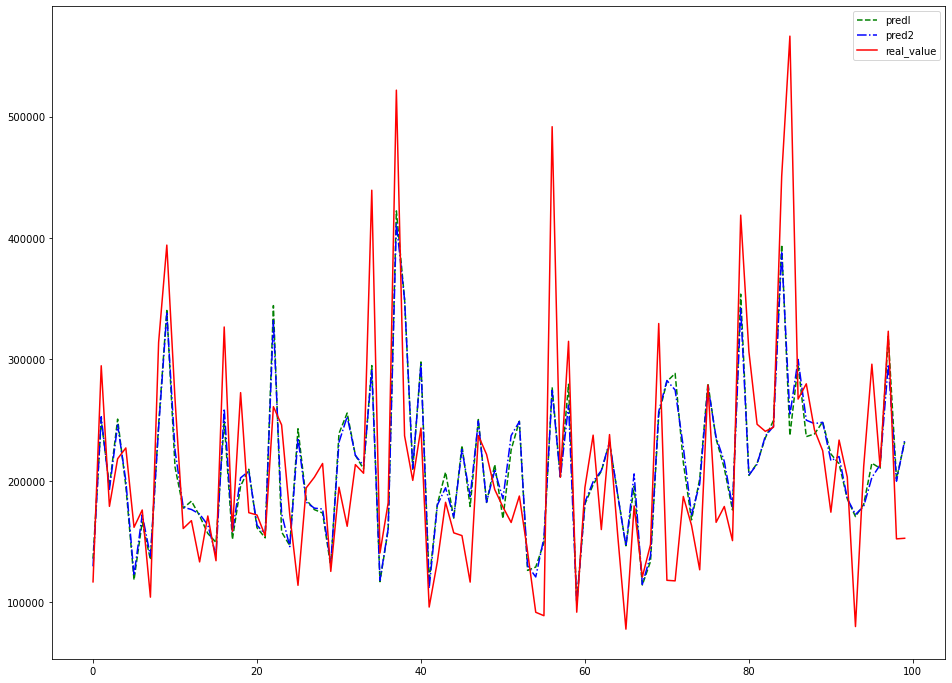

In [961]:
rcParams["figure.figsize"] = 16, 12

x = np.arange(100)
y1 = y_pred1[500:600]
y2 = y_pred2[500:600]
y3 = y_test[500:600]


plt.plot(x,y1, label = 'predl',color = 'green', linestyle = '--')
plt.plot(x,y2, label = 'pred2',color = 'blue', linestyle = '-.')
plt.plot(x,y3, label = 'real_value',color = 'red')

plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

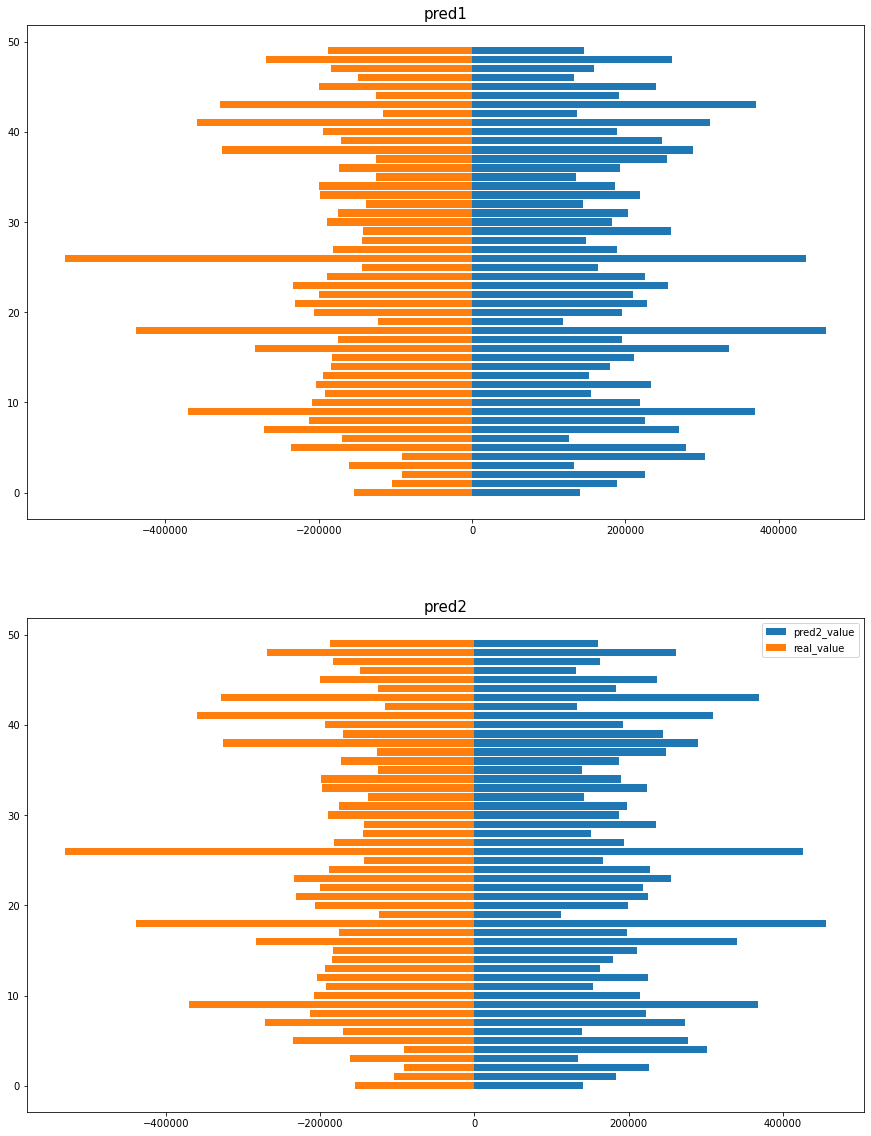

In [962]:
fig, ax = plt.subplots(nrows=2, ncols=1)

fig.set_size_inches(15, 20)
line1 = ax[0].barh(np.arange(50), y_pred1[0:50])
line1.set_label('pred1_value')
line2 = ax[0].barh(np.arange(50), (y_test[0:50] * -1))
line2.set_label('real_value')
line3 = ax[1].barh(np.arange(50), y_pred2[0:50])
line3.set_label('pred2_value')
line4 = ax[1].barh(np.arange(50), (y_test[0:50] * -1))
line4.set_label('real_value')
ax[0].set_title('pred1', size = 15)
ax[1].set_title('pred2', size = 15)
plt.legend()


plt.show

##### Проверим влияние признаков на наши модели

<function matplotlib.pyplot.show(close=None, block=None)>

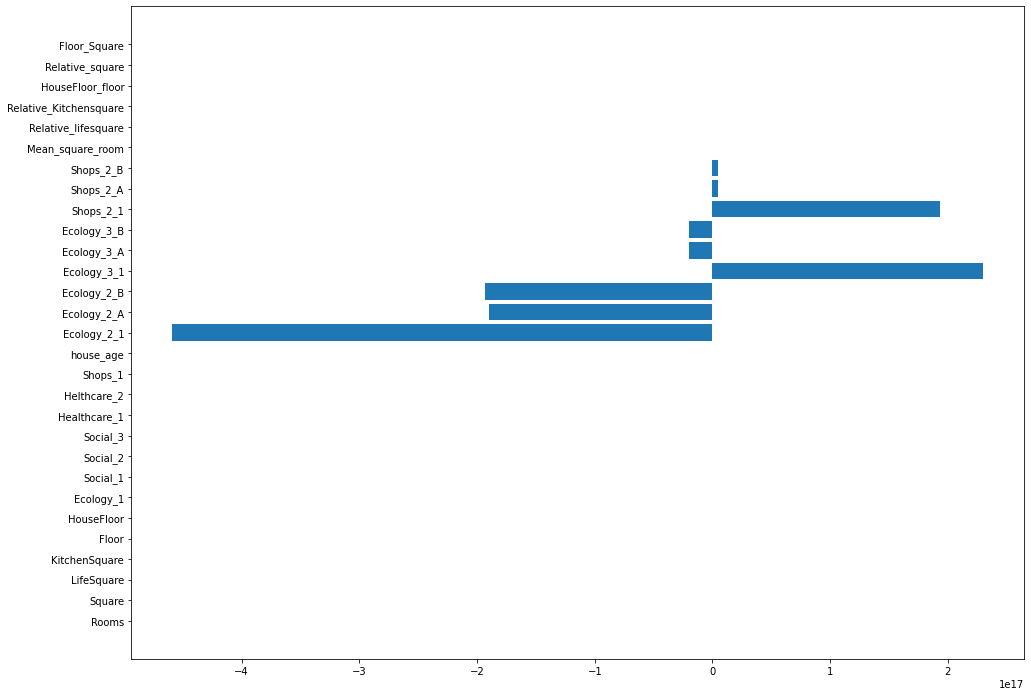

In [963]:
plt.barh(train.columns, model1.coef_.flatten())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

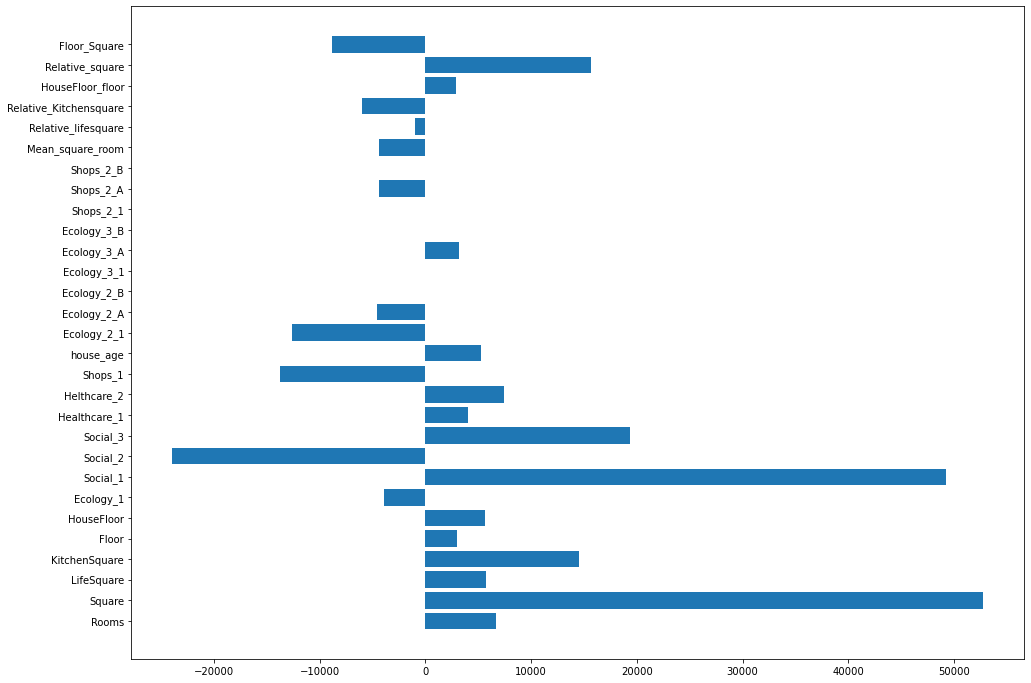

In [964]:
plt.barh(train.columns, model2.coef_.flatten())
plt.show

##### Первая модель показала странные результаты по весам признаков, видимо от нее прийдется отказаться. На второй модели веса признаков распределены более корректно и её параметр R2 выше. Можно попробывать убрать признаки имеющие очень малый вес.

In [965]:
train_scaled = train_scaled.drop(['Shops_2_B', 'Shops_2_1', 'Ecology_3_B', 'Ecology_3_1', 'Ecology_2_B', 'Relative_lifesquare', 'Ecology_2_1'], axis = 1)
test_scaled = test_scaled.drop(['Shops_2_B', 'Shops_2_1', 'Ecology_3_B', 'Ecology_3_1', 'Ecology_2_B', 'Relative_lifesquare', 'Ecology_2_1'], axis = 1)

In [966]:
model2.fit(train_scaled,y_train)

Lasso(alpha=0.003)

<function matplotlib.pyplot.show(close=None, block=None)>

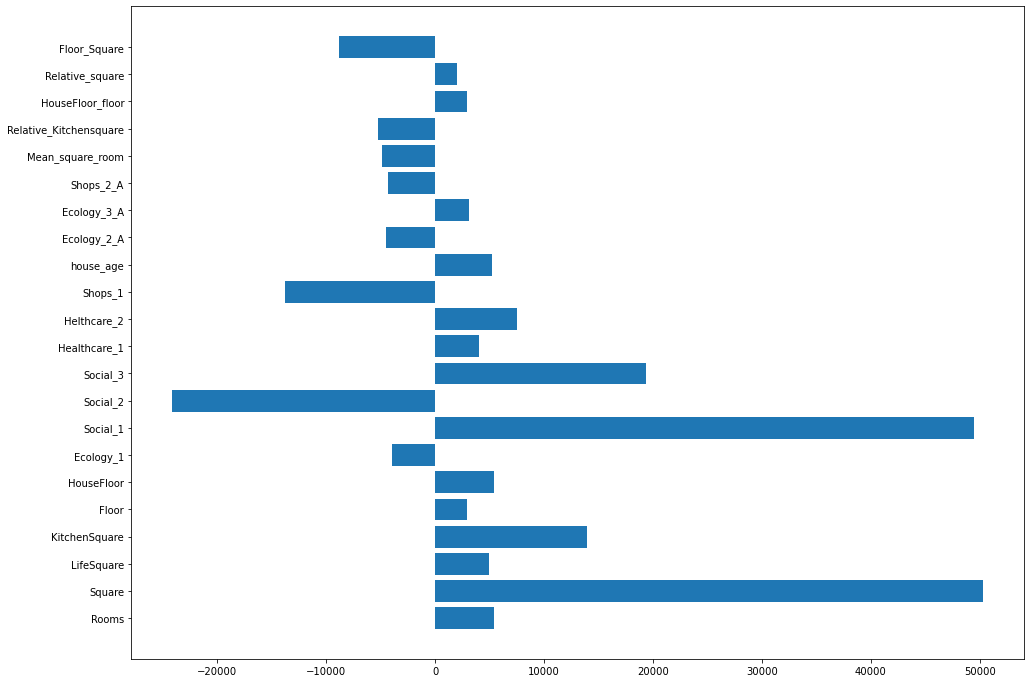

In [967]:
plt.barh(train_scaled.columns, model2.coef_.flatten())
plt.show

In [968]:
pred = model2.predict(test_scaled)


pred = pd.DataFrame({"real_value":y_test, 'pred':pred})
pred

,real_value,pred
8793,154268.366733,137163.541669
1122,104511.383250,185321.282682
1283,91660.877684,226352.384301
9318,160739.238428,131864.426503
7765,91354.549251,301312.400967
...,...,...
3024,103567.513833,123321.401073
5904,133273.635012,225557.413018
3807,252480.400098,268319.084137
6746,175299.739794,170045.940013


In [969]:
r2_score(pred['real_value'], pred['pred'])

0.5400195587750369

##### Приступим к проверке на тестовых данных

In [970]:
test.describe(percentiles=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
1%,170.990000,1.000000,1.000000,30.061233,2.729833,0.000000,1.000000,0.000000,1947.950000,0.000000,0.000000,168.000000,0.000000,30.000000,0.00000,0.000000
10%,1745.500000,6.000000,1.000000,36.929409,19.664540,1.000000,3.000000,4.000000,1965.000000,0.000991,2.000000,475.000000,0.000000,125.000000,0.00000,0.000000
20%,3383.600000,11.000000,1.000000,40.418714,22.011934,1.000000,4.000000,5.000000,1970.000000,0.007720,5.000000,1437.000000,0.000000,240.000000,0.00000,0.000000
30%,5106.700000,23.000000,1.000000,43.570211,24.803601,1.000000,5.000000,9.000000,1976.000000,0.035145,12.000000,2787.000000,1.000000,540.000000,0.00000,1.000000
40%,6714.800000,27.000000,2.000000,47.279642,30.282799,5.000000,6.000000,12.000000,1977.000000,0.050756,22.000000,4472.000000,1.000000,641.600000,0.00000,2.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000


In [971]:
test.loc[test['Rooms'] < 1, 'Rooms'] = 1
test.loc[test['Rooms'] > 5, 'Rooms'] = 5
test.loc[test['Floor'] > 30, 'Floor'] = 30
test.loc[test['Square'] < 20, 'Square'] = 20
test.loc[test['Square'] > 120, 'Square'] = 120
test.loc[test['LifeSquare'] < 5, 'LifeSquare'] = 5
test.loc[test['LifeSquare'] > 120, 'LifeSquare'] = 120
test.loc[test['KitchenSquare'] < 1, 'KitchenSquare'] = 1
test.loc[test['KitchenSquare'] > 70, 'KitchenSquare'] = 70
test.loc[test['HouseFloor'] > 30, 'HouseFloor'] = 30
test.loc[test['HouseFloor'] > 30, 'HouseFloor'] = 30
test.loc[test['Social_3'] > 50, 'Social_3'] = 50
test["LifeSquare"] = test["LifeSquare"].fillna(test["LifeSquare"].median())
test["Healthcare_1"] = test["Healthcare_1"].fillna(test["Healthcare_1"].median())
test.loc[test['HouseFloor'] < test['Floor'], 'HouseFloor'] = test['Floor']
yu = datetime.now()
yu = yu.year
test['house_age'] = yu - test["HouseYear"]
test.loc[test['house_age'] < 1] = 1
test.loc[test['Square'] < test['KitchenSquare'], 'KitchenSquare'] = test['Square'] * 0.5
test.loc[test['Square'] < test['LifeSquare'], 'LifeSquare'] = test['Square'] * 0.5
test = pd.get_dummies(test)
test = test.drop(["HouseYear", 'Id', 'DistrictId'],axis = 1)

In [972]:
test.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,house_age,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.907600,56.300694,33.934770,5.893331,8.615200,13.332800,0.119874,24.933800,5406.900000,5.599800,1029.396400,1.31940,4.242800,36.607400,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,0.809687,18.171585,13.906916,4.418157,5.368025,5.908758,0.120070,17.532202,4026.614773,11.199907,766.595258,1.47994,4.777365,18.573149,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,20.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,41.906231,24.122969,1.000000,4.000000,9.000000,0.019509,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,21.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,52.921340,32.925087,6.000000,7.000000,14.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,44.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,66.285129,38.828601,9.000000,12.000000,17.000000,0.195781,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,48.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,120.000000,120.000000,70.000000,30.000000,30.000000,0.521867,74.000000,19083.000000,50.000000,4849.000000,6.00000,23.000000,113.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [973]:
test['Mean_square_room'] = test['LifeSquare'] / test['Rooms']
test['Relative_Kitchensquare'] = test['KitchenSquare'] / test['Square']
test['HouseFloor_floor'] = test['HouseFloor'] / test['Floor']
test['Relative_square'] = test['Square'].mean() / test['Square']
test['Floor_Square'] = test['Square'] / test['Floor']

In [974]:
test_scaled1 = scaler.fit_transform(test)
test_scaled1 = pd.DataFrame(test_scaled1, columns=test.columns)

In [976]:
test_scaled1 = test_scaled1.drop(['Ecology_2_B', 'Ecology_3_B', 'Shops_2_B'], axis = 1)

In [986]:
TroninSA_predictions = model2.predict(test_scaled1)

In [988]:
TroninSA_predictions = pd.Series(TroninSA_predictions)
TroninSA_predictions.to_pickle('TroninSA_predictions.pkl')